## Module 5 Practice - Population Pyramids


A **population pyramid** is a special type of **bar chart** that shows the distribution of ages or age groups in a specific population. 

It usually shows gender as part of the pyramid, but can also be augmented with other information such as race, marital status, education level, etc. 

In this practice, we will see how we can manipulate a **bar chart in ggplot2** by using different components of the **layered grammar** to produce a population pyramid. 


This type of visualization can also be used for other purposes whenever we want to show **the distribution of a variable among the two values of another variable**. 

---


First take a look at simple bar chart and see how we can use the **position adjustment** component to create different types of bar charts. 

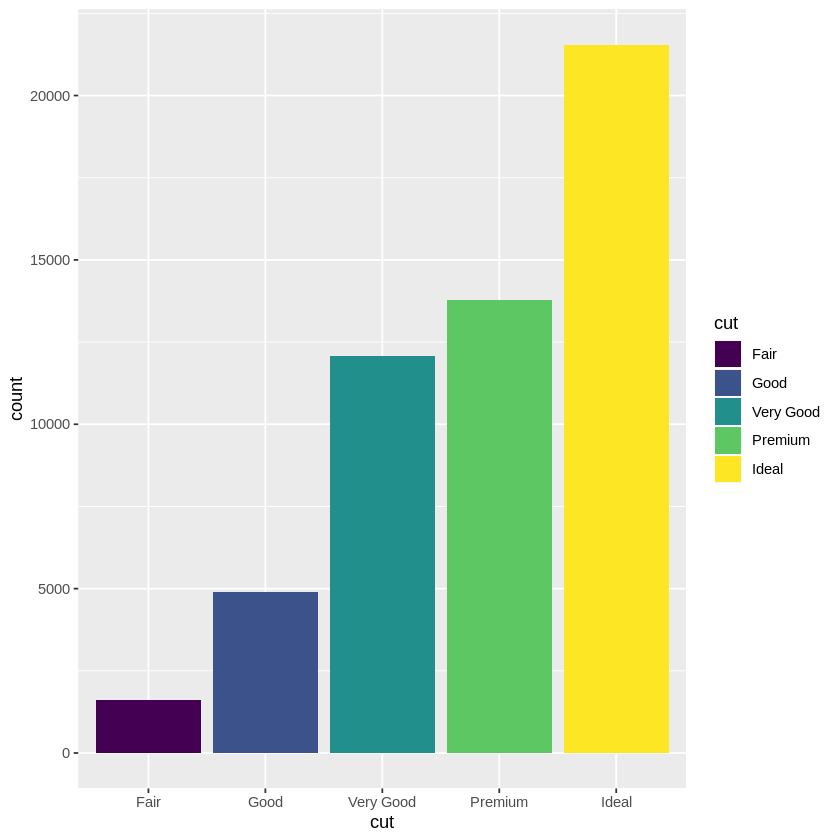

In [14]:
library(ggplot2)
ggplot(data=diamonds) + geom_bar(mapping=aes(x=cut, fill=cut))

**`geom_bar()` geom counts the number of data points that have a particular *cut* and plots them as bars.** 

Above, color is not really important. We can assign another attribute to the *fill* property. In that case, we'll have a **stacked bar chart** where colors represent that attribute's levels. 

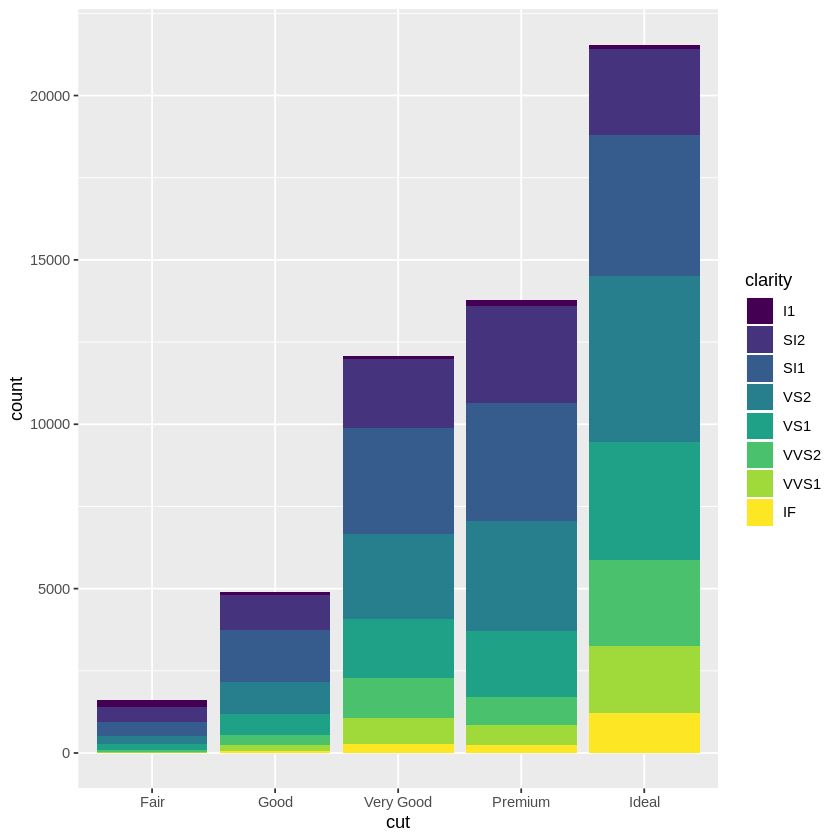

In [3]:
ggplot(data=diamonds) + geom_bar(mapping=aes(x=cut, fill=clarity))

**We can control the positioning of the bars by adding a position adjustment component.** 

`position` can be one of the following: "`identity`", "`stack`", "`dodge`", "`fill`", "`jitter`".

When `position = "identity"`, ggplot2 will place each object exactly where it falls in the context of the graph.
For the bar chart, this would mean that each bar would start at y = 0 and would appear directly above the cut value that it describes. 

Since there are eight bars for each value of cut, **many bars would overlap!** It will *look like* a stacked bar chart, but the stacked heights will be **inaccurate**, because each bar starts from `y = 0` and they overlap.

`position = "identity"` is a good default position adjustment for many geoms such as `geom_point()`, but not very useful for bar chart in general. Later, we will see how to use it sensibly for the population pyramid.

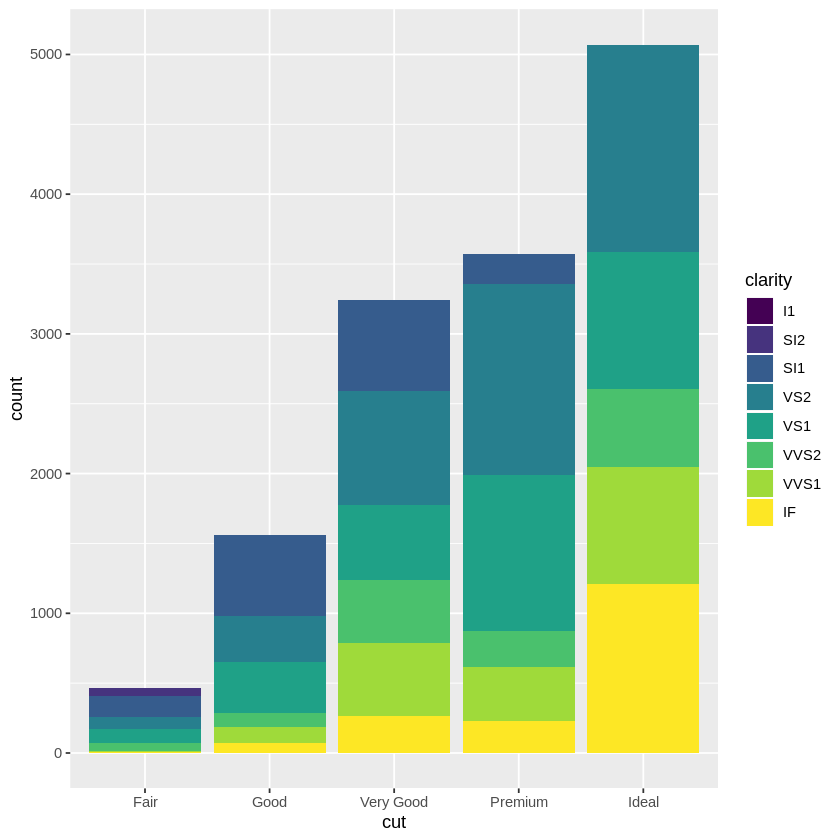

In [4]:

# this is NOT a stacked bar chart!! All colored bars start from ZERO, they are not stacked. 

ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "identity")


To understand better, let's use alpha transparency to see what is going on with `identity` and `stack` position adjustments. 

Below, you can see how colors get darker as bars are superposed. Compare it to the next plot. 

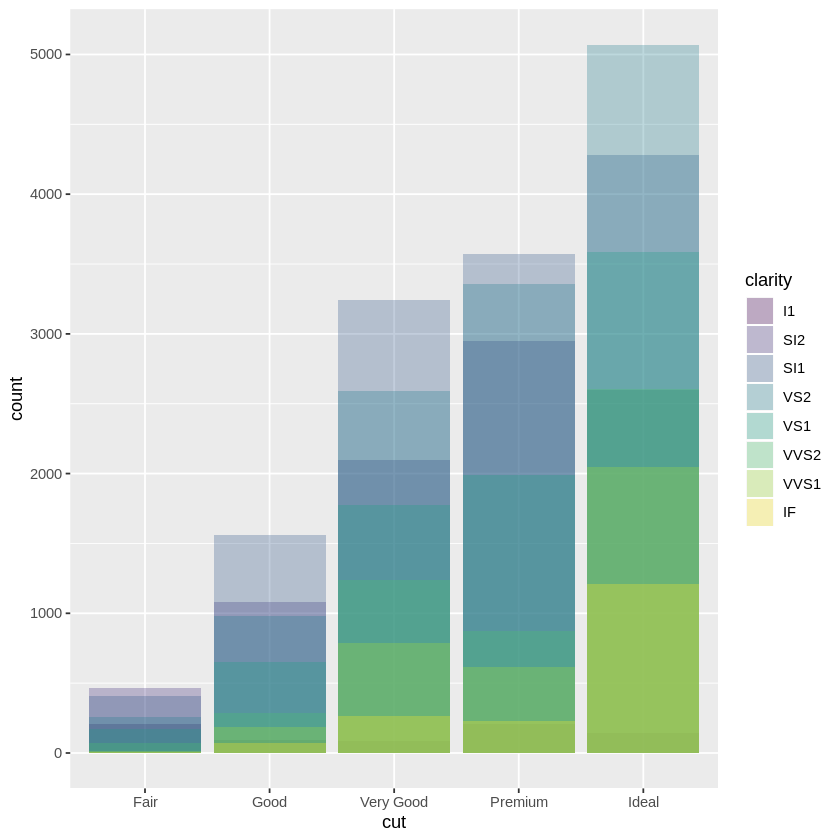

In [5]:

#All colored bars start from ZERO, they are not stacked.

ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "identity", alpha=0.3)


Below, the default position adjustment is `stack`. We can see all colors have similar transparency, because they do not superpose. 

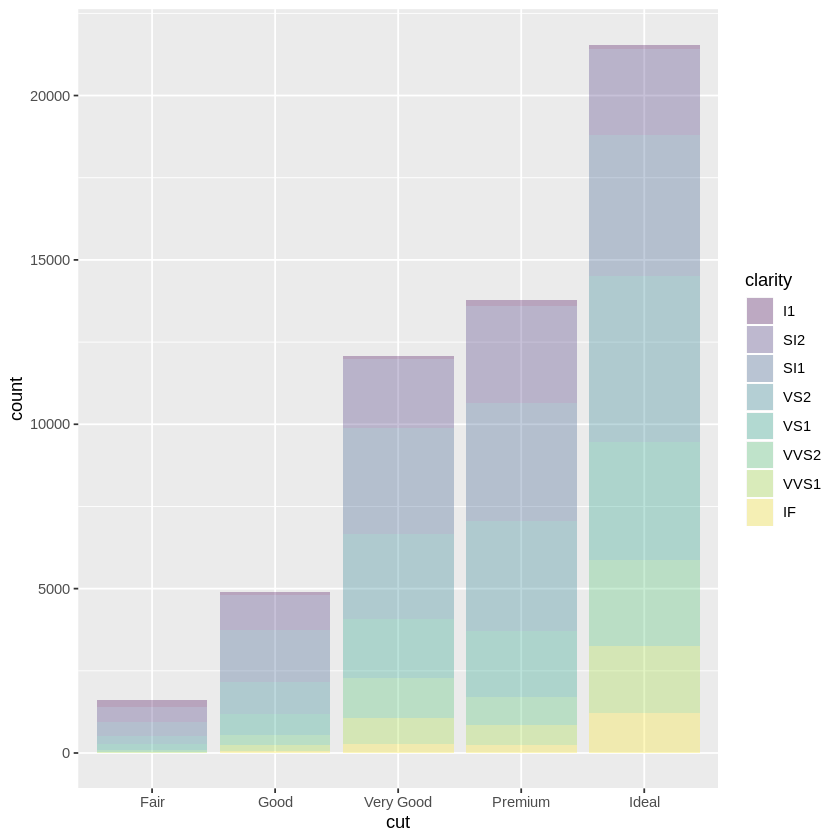

In [6]:
ggplot(data=diamonds) + geom_bar(mapping=aes(x=cut, fill=clarity), alpha=0.3)

`"stack"` position is the **default** for the geom_bar if there is an attribute assigned to **fill**. We can explicitly use it, too. 


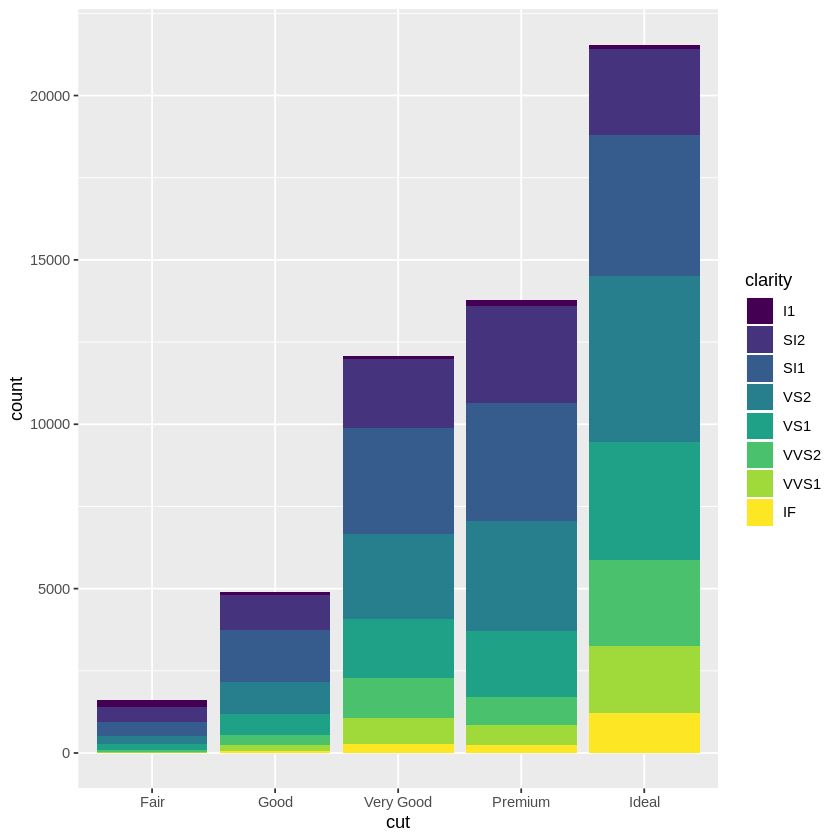

In [7]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "stack") 

If we want to **compare the percentage distribution** of the groups, we can use `fill` position adjustment that will 
stretch bars to a 100% line and show the distribution.

## YOUR TURN: 
when `position` parameter is "`fill`", it creates a bar chart that shows the relative frequencies across groups.

**Redo the last plot with `fill` as position parameter.**


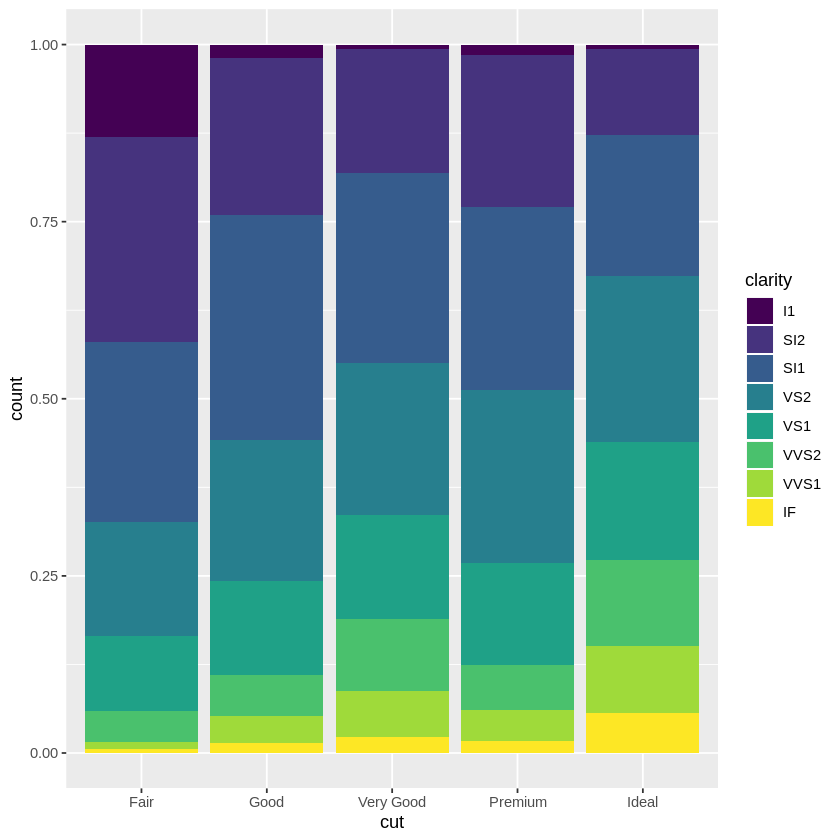

In [8]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") 


---

If we want bars next to each other, we use `"dodge"`. 

**Redo the last plot with `"dodge"` position adjustment.**


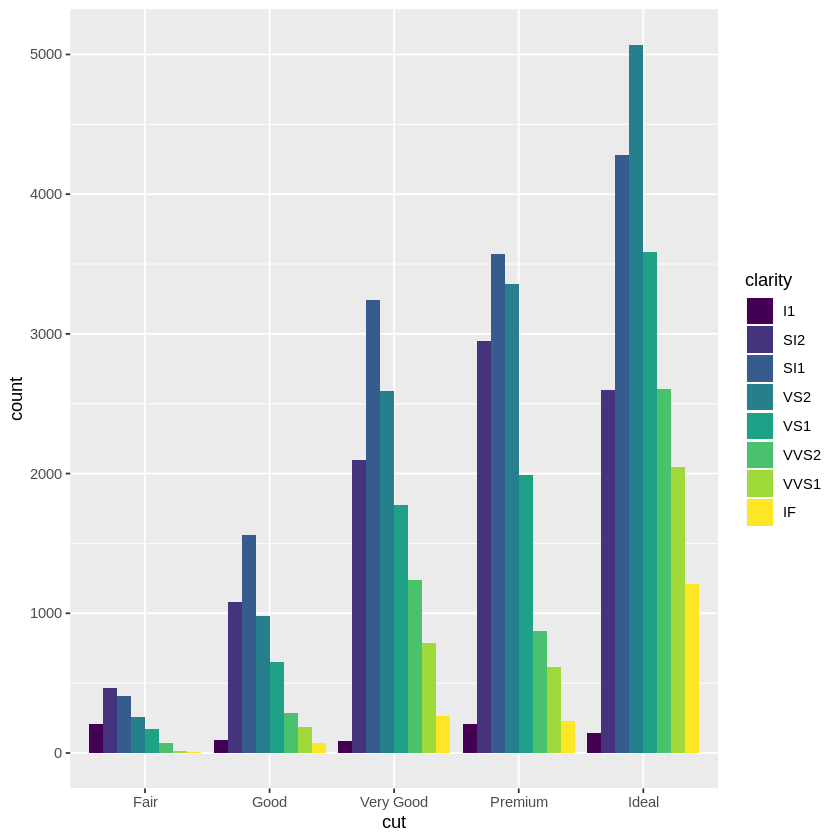

In [9]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")



---


**And finally, we can flip the coordinate system by adding `coord_flip()` to the plot as another component.**

**Redo the last plot with flipping the coordinates.** 

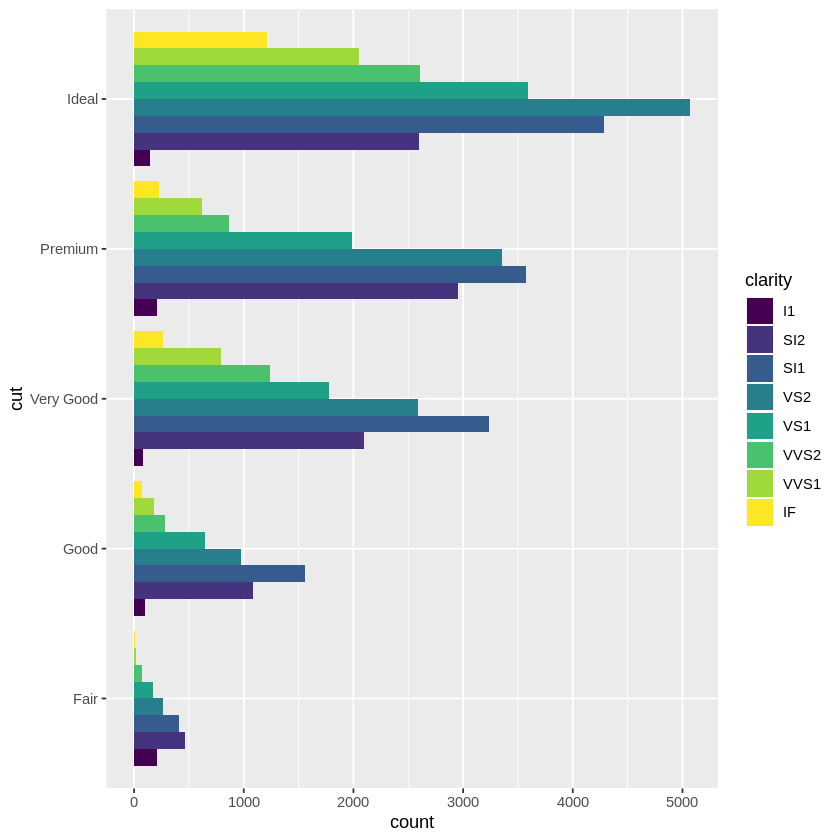

In [10]:

ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") + coord_flip()

---

We can also change the coordinate system from cartesian to **polar**.

**Redo the last plot with addition of the `coord_polar()`.** 


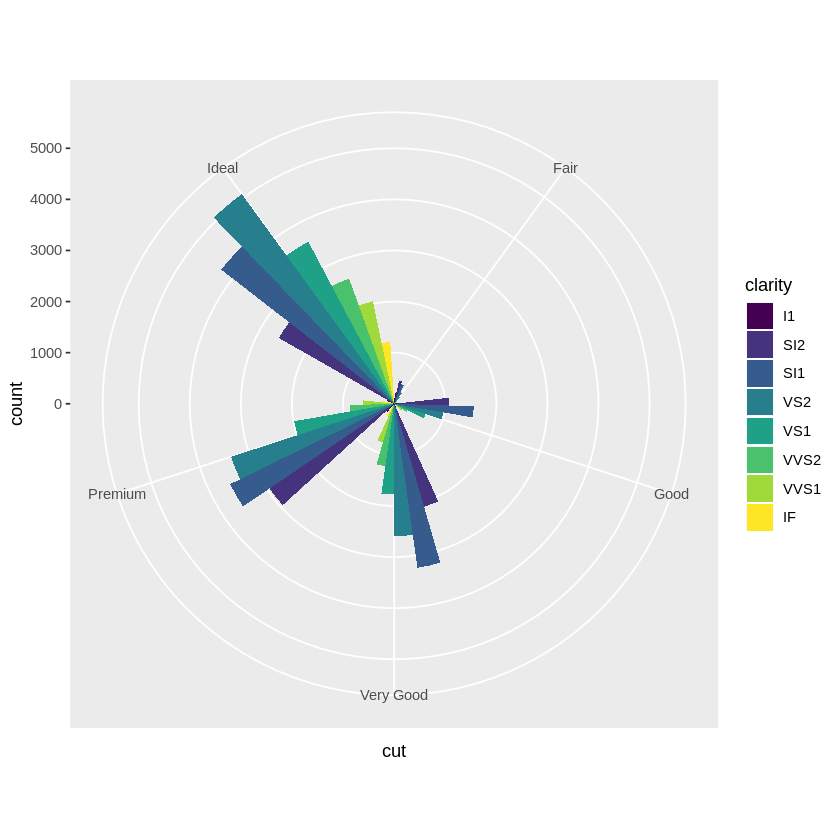

In [11]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") + coord_polar()


The plot above uses the x axis for `coord_polar()` by default, we can assign the y axis to the angle of the polar coordinates, too.

**Redo the last plot and change the theta parameter of `coord_polar()` to `"y"`  (like in the lab).** 


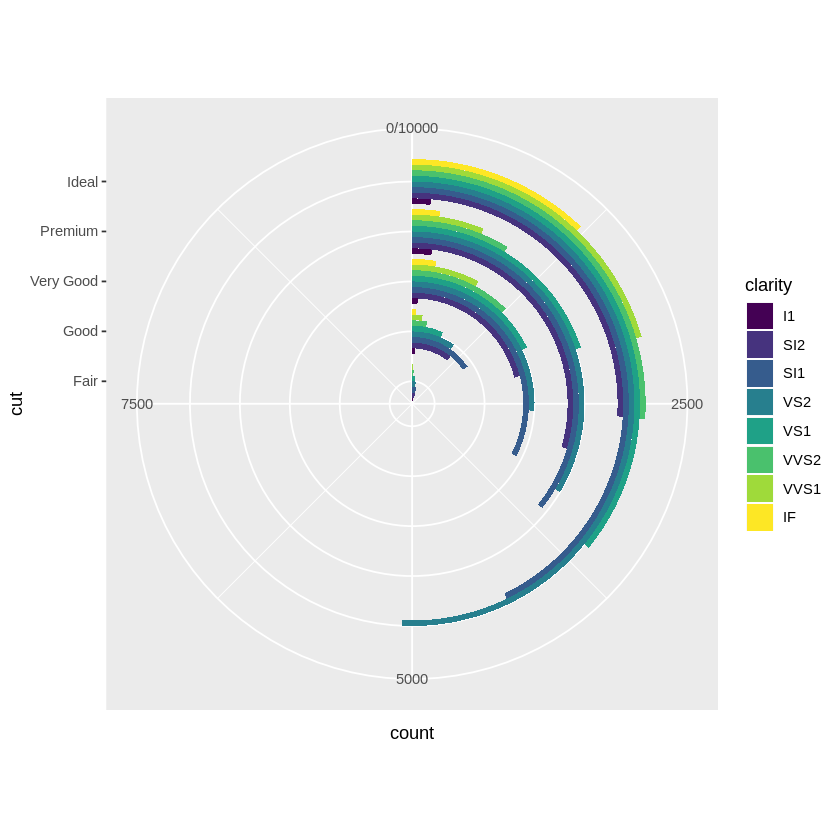

In [19]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge") + coord_polar(theta = "y") + ylim(0,10000)


---


The difference between a bar chart, pie chart, and a coxcomb chart (a.k.a. polar area diagram, or Nightingale rose diagram) according to the modular, layered approach of ggplot is **only the coordinate transformation** that is used on the geom_bar. 

**Let's see it.**

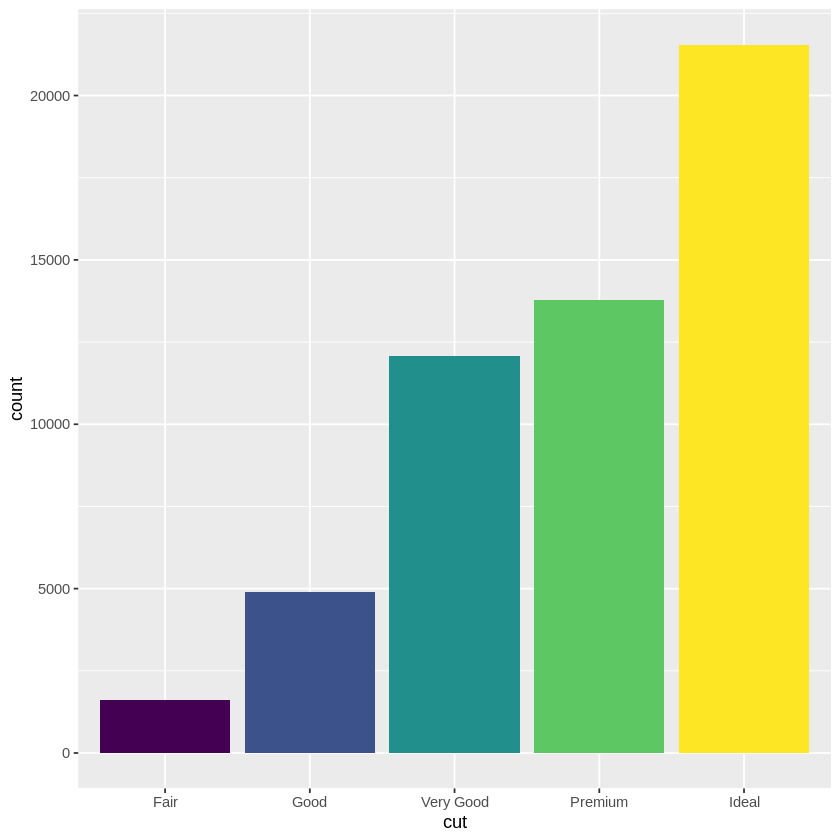

In [20]:
# bar chart
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut)) + theme(legend.position="none")

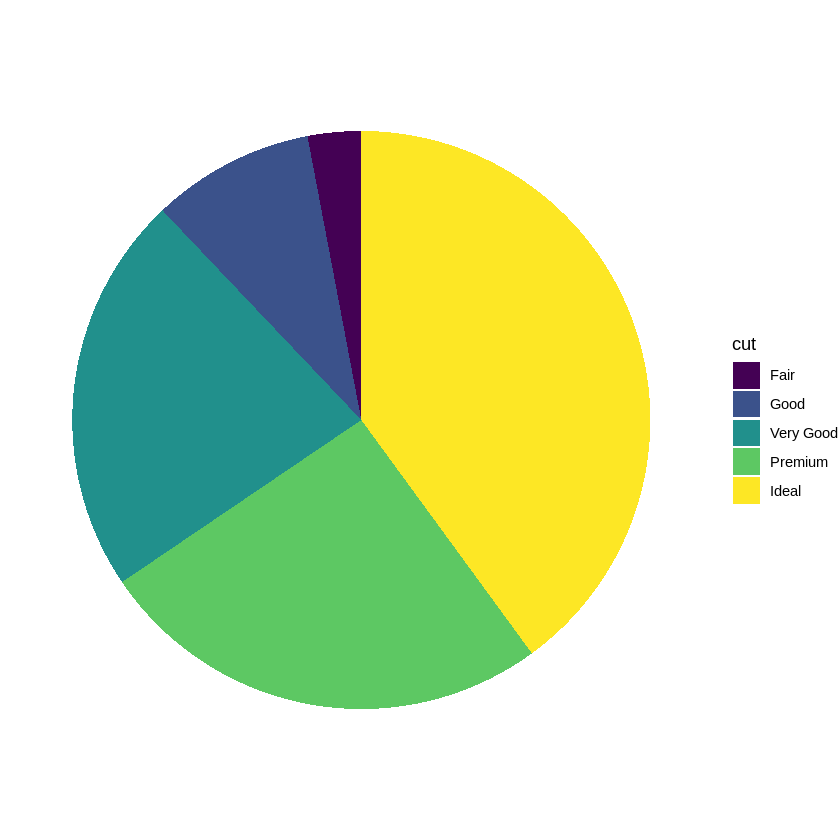

In [33]:
# pie chart
ggplot(data = diamonds) + geom_bar(mapping = aes(x = factor(1), fill = cut), width=1) + coord_polar(theta="y") +
theme_void()

In [1]:
# polar area diagram
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut), width=1) + coord_polar(theta="x") +
 theme(legend.position="none")

ERROR: Error in ggplot(data = diamonds): could not find function "ggplot"



---

### Population Pyramid

**Now that we know how to manipulate the position and the coordinates, let's create a population pyramid.**

In [23]:
census = read.csv("/dsa/data/all_datasets/census/census2010pyr.csv")
head(census)
summary(census)

sex,age,pop
<fct>,<int>,<int>
Male,0,2014276
Male,1,2030853
Male,2,2092198
Male,3,2104550
Male,4,2077550
Male,5,2072094


     sex           age             pop         
 Female:100   Min.   : 0.00   Min.   :   6073  
 Male  :100   1st Qu.:24.75   1st Qu.: 823401  
              Median :49.50   Median :1981561  
              Mean   :49.50   Mean   :1543461  
              3rd Qu.:74.25   3rd Qu.:2105907  
              Max.   :99.00   Max.   :2359941  

First, we start with a bar chart that shows the population for each age.
Here, we have to use `identity` stat to draw the actual population number; we are NOT counting the number of different ages.

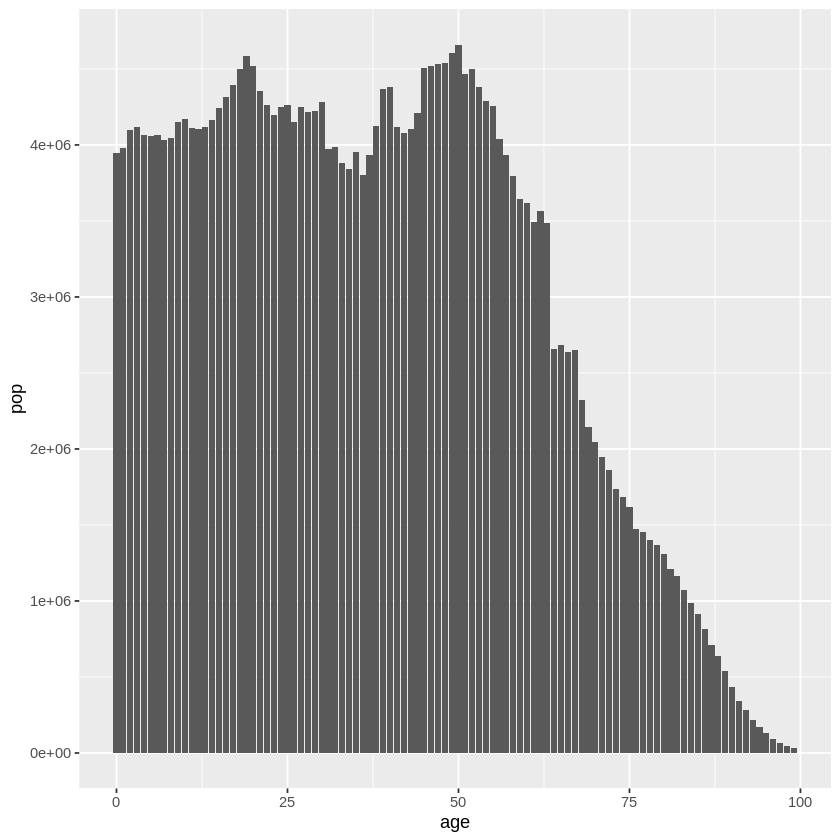

In [24]:
ggplot(census, aes(x=age, y=pop)) + geom_bar(stat="identity")

Now, let's add the sex column as `fill`. 


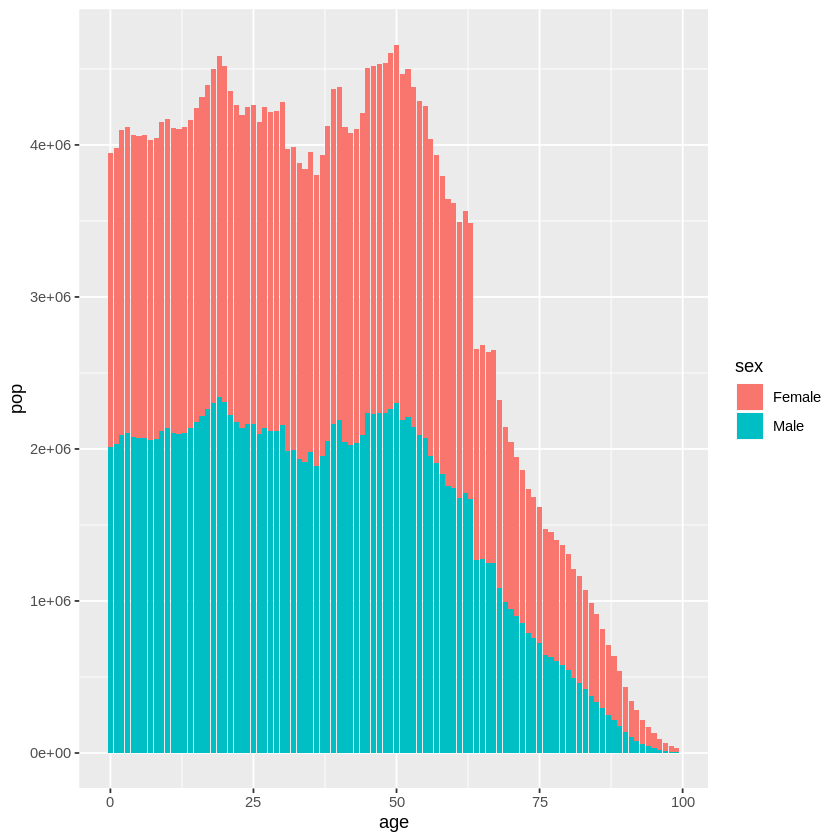

In [25]:
ggplot(census, aes(x=age, y=pop, fill=sex)) + geom_bar(stat="identity") # now, by default they are stacked

Now, we want to separate males and females to the different sides of the x axis. 

Let's create a layer with females only. Here we see an example of how to use a subset of data (it could also be a totally different data set.) 


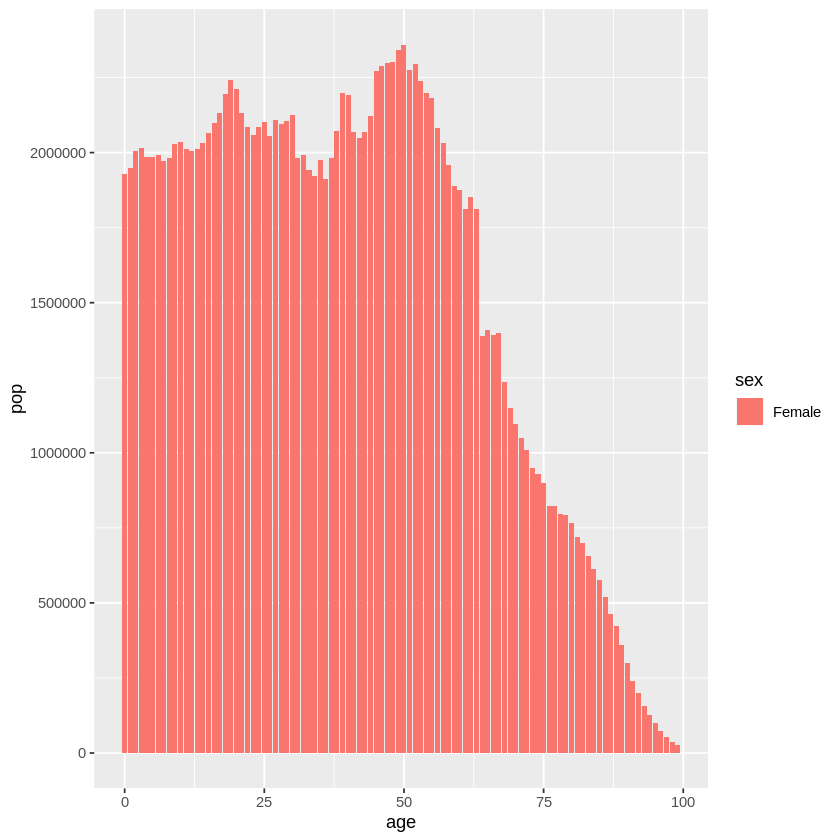

In [26]:

ggplot(census, aes(x=age, y=pop, fill=sex)) + 

geom_bar(data = subset(census, sex=="Female"), stat="identity") 

#Let's add males to the plot. 

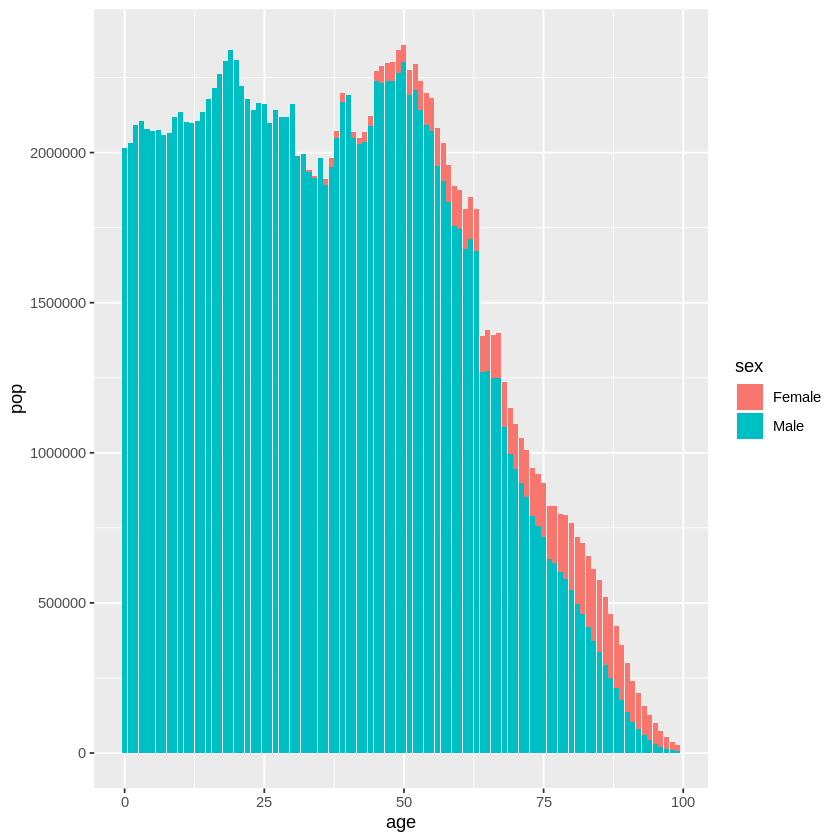

In [27]:
ggplot(census, aes(x=age,y=pop, fill=sex)) + 

geom_bar(data = subset(census, sex=="Female"), stat = "identity") +

geom_bar(data = subset(census, sex=="Male"), stat = "identity")

### There is overlap! 

They are NOT stacked, because they are in different geom layers. 

**We want males on the other side of the axis; we can negate the population numbers to achieve that.**


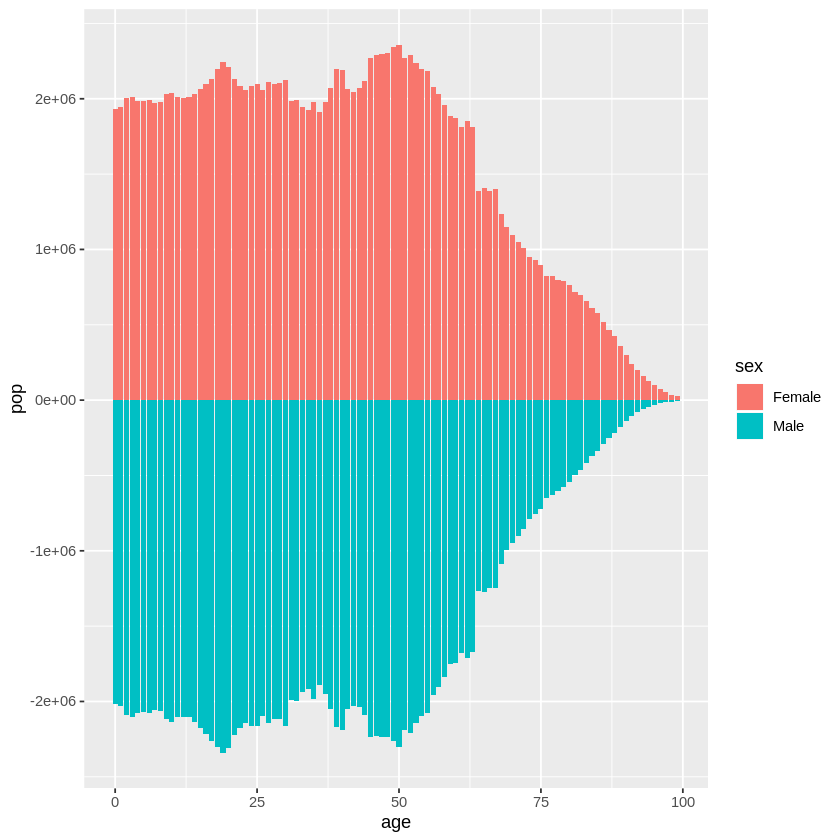

In [28]:
ggplot(census, aes(x=age,y=pop, fill=sex)) + 

geom_bar(data = subset(census, sex=="Female"), stat = "identity") +

geom_bar(data = subset(census, sex=="Male"), stat = "identity", aes(y=-pop))

**And finally, let's flip the coordinates, use a better theme, and adjust labels to positive.** 

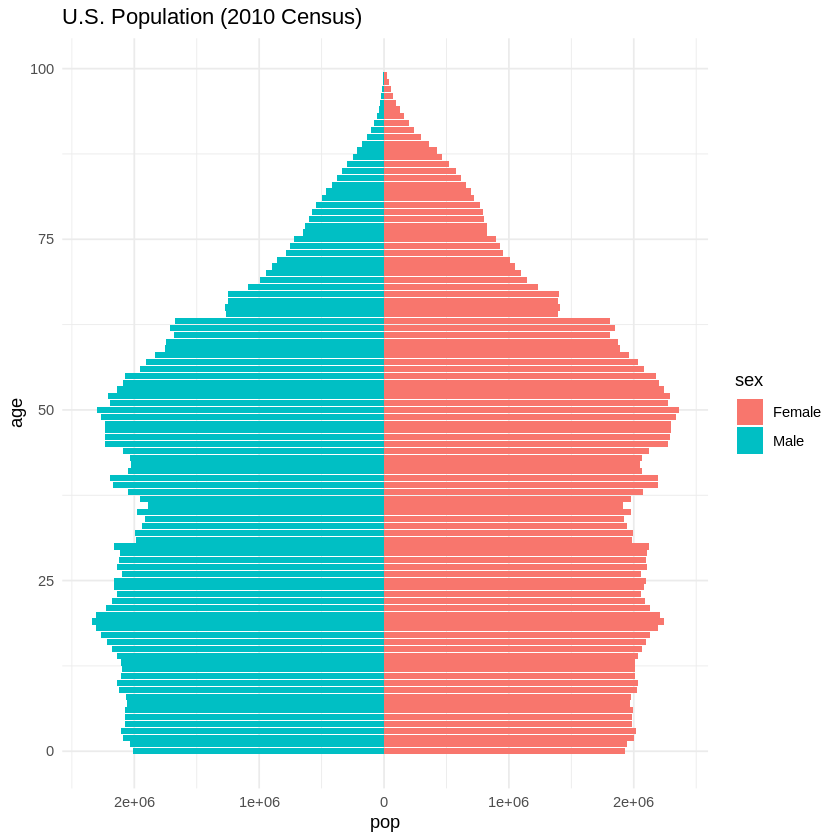

In [29]:
ggplot(census, aes(x=age,y=pop, fill=sex)) + 

geom_bar(data = subset(census, sex=="Female"), stat = "identity") +

geom_bar(data = subset(census, sex=="Male"), stat = "identity", aes(y=-pop)) +

coord_flip() +

theme_minimal() +

scale_y_continuous(labels = abs) +

ggtitle("U.S. Population (2010 Census)")
 

This is how a population pyramid looks like. **We achieved that by using different layers and components of the ggplot2. This modular approach makes it easy to create complicated plots by adding layers and manipulating different components of them.** 

We could also create a pyramid by using plotly like following (you may have to run the cell twice):


In [16]:
library(plotly)
library(dplyr)

# create another attribute to separate male and female pop into negative and positive values
ncensus <- mutate(census, npop=ifelse(sex=="Male",-pop,pop))
head(ncensus)

plot_ly(ncensus, x = ~npop, y = ~age, color =~sex) %>%
  add_bars(orientation = "h",
        hoverinfo = "y+text+name", text = ~pop,         
        colors = c("pink", "lightblue")) %>%
  layout(bargap = 0.1, barmode = "overlay", 
         title = "Population", 
         xaxis = list(tickmode = "array", 
                      tickvals = c(-2000000, -1000000, 0, 1000000, 2000000 ),
                      ticktext = c("2M", "1M", "0", "1M", "2M"), 
                      title = "Population"), 
         yaxis = list(title = "Age"))

ERROR: Error in mutate(census, npop = ifelse(sex == "Male", -pop, pop)): object 'census' not found



---

**We can use this type of plot for other purposes. Let's see an example where we compute the average life expectancy of continents over countries grouped by whether the life expectancy in that country is less than 65 or not.** 

In [31]:
co = read.csv("/dsa/data/all_datasets/census/countries.csv")

head(co)

Country..en.,Country..de.,Country..local.,Country.code,Continent,Capital,Population,Area,Coastline,Government.form,Currency,Currency.code,Dialing.prefix,Birthrate,Deathrate,Life.expectancy,Url
<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,NA,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.3,13.7,51.3,https://www.laenderdaten.info/Asien/Afghanistan/index.php
Egypt,Ägypten,Misr,EG,Africa,NA,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.3,4.7,72.7,https://www.laenderdaten.info/Afrika/Aegypten/index.php
Åland Islands,Ålandinseln,Åland,AX,Europe,NA,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.0,0.0,0.0,https://www.laenderdaten.info/Europa/Aland/index.php
Albania,Albanien,Shqipëria,AL,Europe,NA,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.1,6.7,78.3,https://www.laenderdaten.info/Europa/Albanien/index.php
Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,NA,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.0,4.3,76.8,https://www.laenderdaten.info/Afrika/Algerien/index.php
American Samoa,Amerikanisch Samoa,Amerika Samoa,AS,Oceania,NA,54194,199,116,Presidential democracy (self-governing territory of the US),Dollar,USD,1-684,22.9,4.8,75.4,https://www.laenderdaten.info/Ozeanien/Amerikanisch-Samoa/index.php


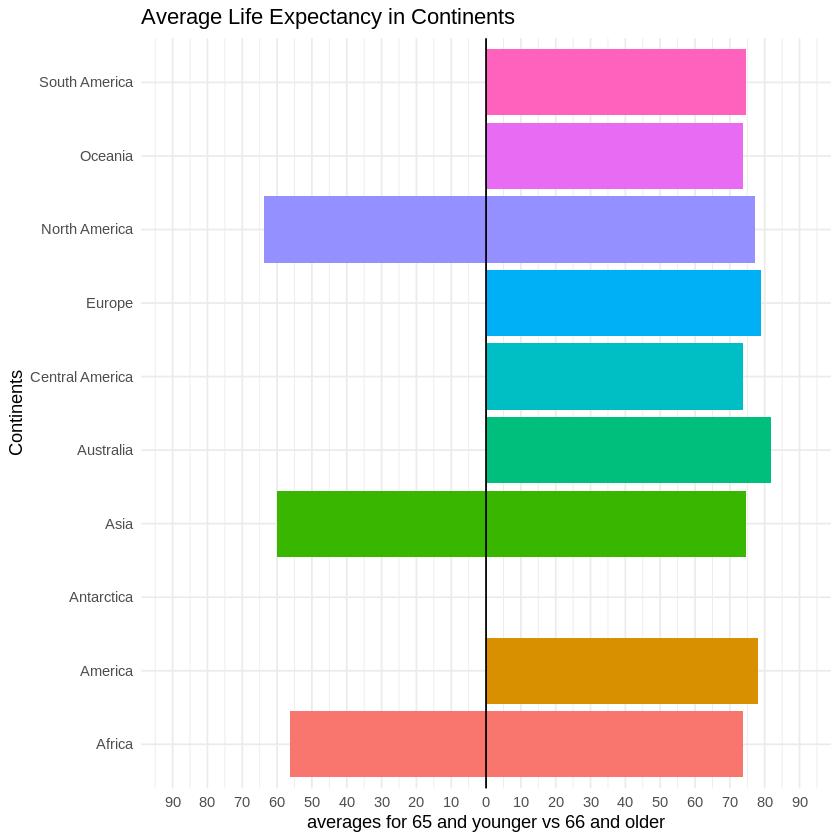

In [32]:
# we will have a bar plot with continents in x and life expectancy averages in y

ggplot(co, aes(x=as.factor(Continent), y=Life.expectancy, fill=Continent)) + 

# create two subsets by picking countries with >65 or <= 65 and compute the averages of each group per continent 
geom_bar(data = subset(co, Life.expectancy > 65), stat = "summary", fun.y = "mean") +
geom_bar(data = subset(co, Life.expectancy <= 65), stat = "summary", fun.y = "mean", aes(y=-Life.expectancy)) +

# put a zero line 
geom_abline(slope=0) +

# arrange the tick marks 
scale_y_continuous(labels = abs, limits=c(-90,90), breaks=seq(-90,90,10)) +

# flip the coord system 
coord_flip() +

# make it look nice 
ylab("averages for 65 and younger vs 66 and older") + xlab("Continents") +
theme_minimal() +
ggtitle("Average Life Expectancy in Continents") +
theme(legend.position="none")


**In the above plot, left hand side shows the average life expectancy for continents averaged over those countries where life expectancy is less than 65.** Those countries are apparently only in North America, Asia, and Africa. 

**Right hand side shows the the same averaged over countries with life expectancy more than 65.** 